In [ ]:
#installing important libraries
!pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 28.9 MB/s eta 0:00:00


In [ ]:
#importing necessary libraries
import pandas as pd #for data manipulation and analysis
import numpy as np #for mathematical functions
pd.set_option('display.max_columns',None) # to display all the columns
import seaborn as sns #for data visualisation
import matplotlib.pyplot as plt
import requests

In [ ]:
#to mount the google drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# reading the data set
train_df = pd.read_csv('/content/train.csv') #change the location accordingly
test_df = pd.read_csv('/content/test.csv')

# Data Understanding

In [ ]:
train_df

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,totalVideos,totalCredits,criticReviewsTotal,titleType,awardNominationsExcludeWins,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres
0,Neogenic Nightmare Chapter 3: Hydro-Man,"(7, 8]",1995,\N,\N,0.0,779,1,10,1,0,21,1,tvEpisode,0,False,True,0,1,0,781,['US'],"Action,Adventure,Animation"
1,Looping,"(5, 6]",1982,\N,\N,0.0,11,1,10,1,0,1,0,videoGame,0,False,True,0,1,0,11,['XWG'],Action
2,Idealnaya para,"(5, 6]",1992,\N,\N,0.0,38,1,10,1,0,24,0,movie,0,False,True,0,1,1,38,['RU'],Comedy
3,MasterChef Celebrity México,"(5, 6]",2021,\N,\N,0.0,15,1,10,22,0,56,0,tvSeries,0,True,True,0,1,0,15,['MX'],Reality-TV
4,Seutateueob,"(7, 8]",2020,2020,80,1.0,15718,1,10,347,2,47,4,tvSeries,1,True,True,0,32,452,15746,['KR'],"Comedy,Drama,Romance"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16426,Caprices,"(5, 6]",1942,\N,\N,0.0,73,1,10,4,0,45,1,movie,0,False,True,0,14,4,73,['FR'],Comedy
16427,Haar Jeet,"(4, 5]",1990,\N,\N,0.0,15,1,10,2,0,22,0,movie,0,False,True,0,1,1,15,['IN'],"Action,Drama,Thriller"
16428,Kotigobba 3,"(5, 6]",2021,\N,140,0.0,2560,1,10,39,3,129,0,movie,5,False,True,0,5,49,2560,['IN'],"Action,Drama,Romance"
16429,Ator l'invincibile,"(3, 4]",1982,\N,\N,0.0,3011,1,10,52,1,53,55,movie,0,False,True,0,26,58,3012,['IT'],"Action,Adventure,Fantasy"


So, we have total number of rows in the dataset = train_df + test_df

                                                = 16431 + 5478
                                                = 21909
So, the dataset is divided in the ratio 3:1

In [ ]:
#print the info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16431 entries, 0 to 16430
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   originalTitle                16431 non-null  object 
 1   rating                       16431 non-null  object 
 2   startYear                    16431 non-null  int64  
 3   endYear                      16431 non-null  object 
 4   runtimeMinutes               16431 non-null  object 
 5   awardWins                    13813 non-null  float64
 6   numVotes                     16431 non-null  int64  
 7   worstRating                  16431 non-null  int64  
 8   bestRating                   16431 non-null  int64  
 9   totalImages                  16431 non-null  int64  
 10  totalVideos                  16431 non-null  int64  
 11  totalCredits                 16431 non-null  int64  
 12  criticReviewsTotal           16431 non-null  int64  
 13  titleType       

In [ ]:
#Descriptive Statistics
train_df.describe()

,startYear,awardWins,numVotes,worstRating,bestRating,totalImages,totalVideos,totalCredits,criticReviewsTotal,awardNominationsExcludeWins,isAdult,numRegions,userReviewsTotal,ratingCount
count,16431.000000,13813.000000,16431.000000,16431.0,16431.0,16431.000000,16431.000000,16431.000000,16431.000000,16431.000000,16431.000000,16431.000000,16431.000000,16431.000000
mean,1991.867081,0.491855,1492.153551,1.0,10.0,11.477025,0.271499,61.341976,2.785527,0.558883,0.025927,3.549206,7.228410,1492.915039
std,26.120690,2.974264,20137.708096,0.0,0.0,74.254261,3.115448,174.017450,15.411389,3.955372,0.158921,5.854671,66.495606,20145.393446
min,1878.000000,0.000000,5.000000,1.0,10.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,5.000000
25%,1978.000000,0.000000,15.000000,1.0,10.0,1.000000,0.000000,16.000000,0.000000,0.000000,0.000000,1.000000,0.000000,15.000000
50%,1997.000000,0.000000,36.000000,1.0,10.0,1.000000,0.000000,34.000000,0.000000,0.000000,0.000000,1.000000,0.000000,36.000000
75%,2013.000000,0.000000,148.500000,1.0,10.0,6.000000,0.000000,65.000000,1.000000,0.000000,0.000000,3.000000,2.000000,149.000000
max,2024.000000,145.000000,966565.000000,1.0,10.0,3504.000000,258.000000,15742.000000,533.000000,197.000000,1.000000,69.000000,5727.000000,967042.000000


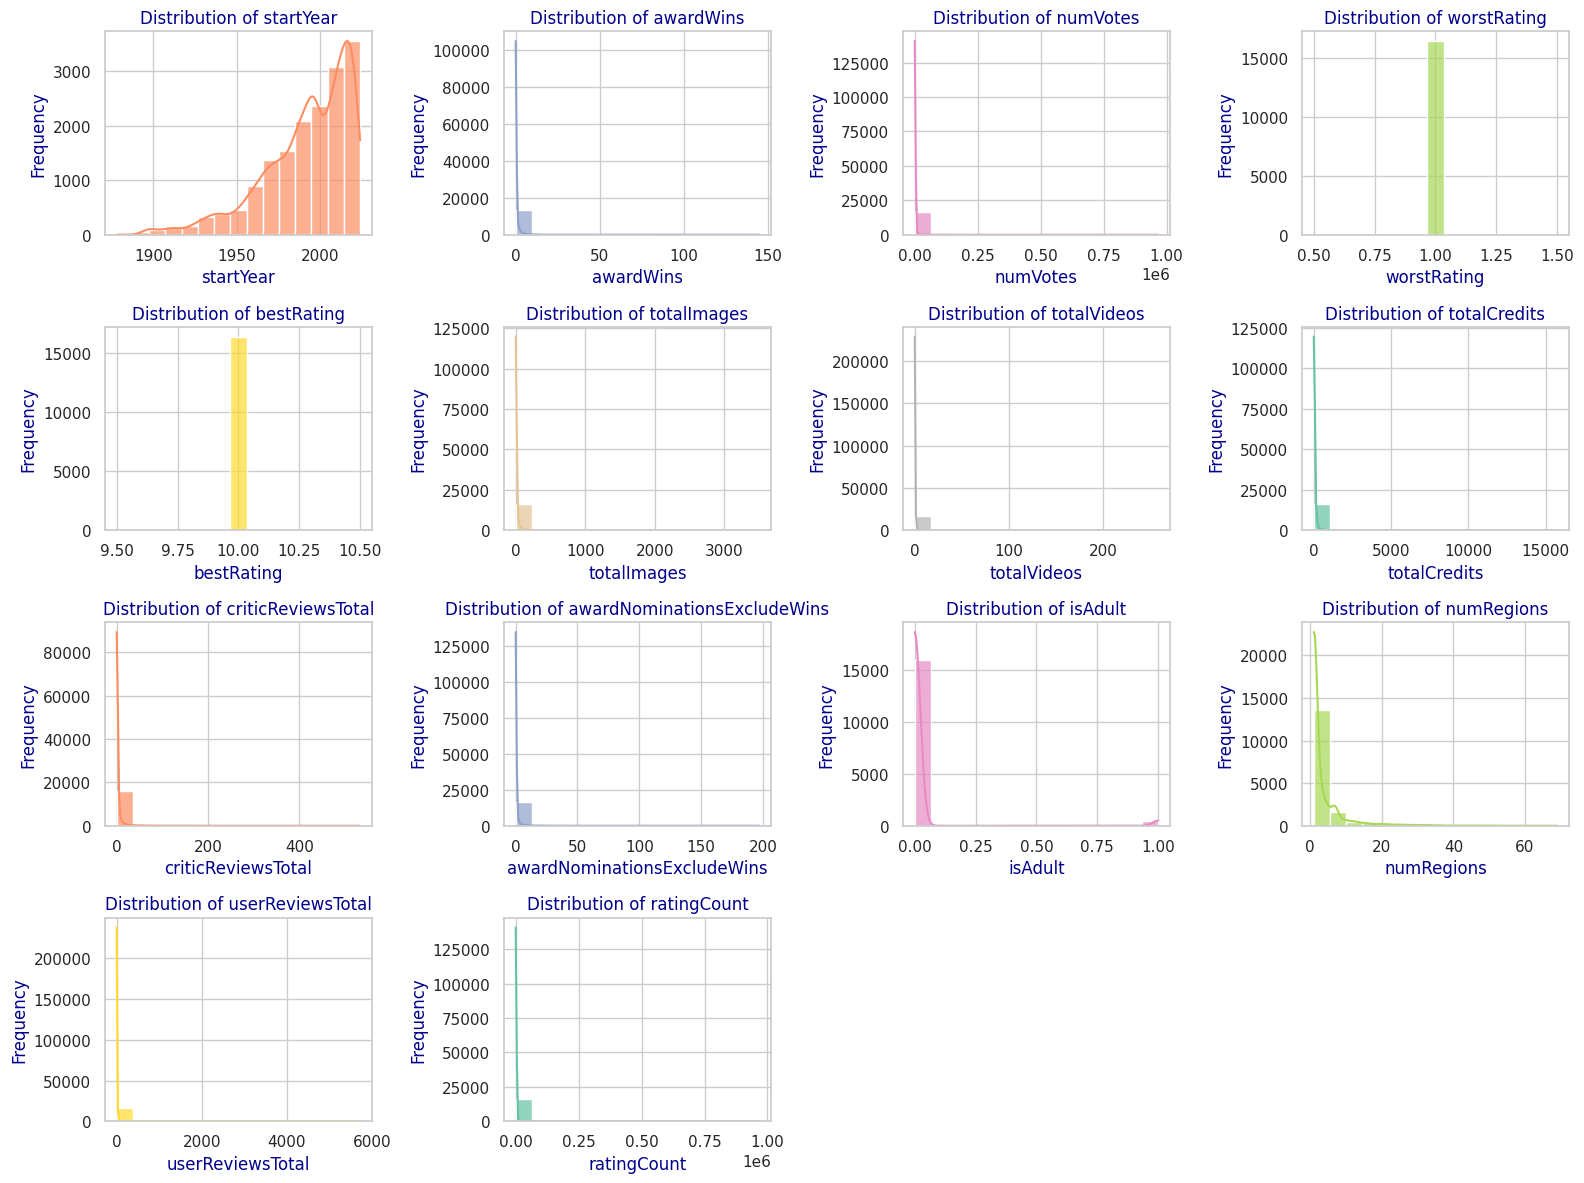

In [ ]:
# Set a seaborn theme for styling
sns.set_theme(style="whitegrid")

# Adjust figure size
plt.figure(figsize=(16, 12))

# Select numerical columns
numerical_columns = train_df.select_dtypes(include=['float64', 'int64']).columns

# Define a color palette
colors = sns.color_palette("Set2", len(numerical_columns))

# Loop through numerical columns to create subplots
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(train_df[col], kde=True, bins=15, color=colors[i % len(colors)], alpha=0.7)
    plt.title(f'Distribution of {col}', fontsize=12, fontweight='normal', color='darkblue')
    plt.xlabel(col, fontsize=12, color='darkblue')
    plt.ylabel('Frequency', fontsize=12, color='darkblue')

# Adjust layout for readability
plt.tight_layout()
plt.show()


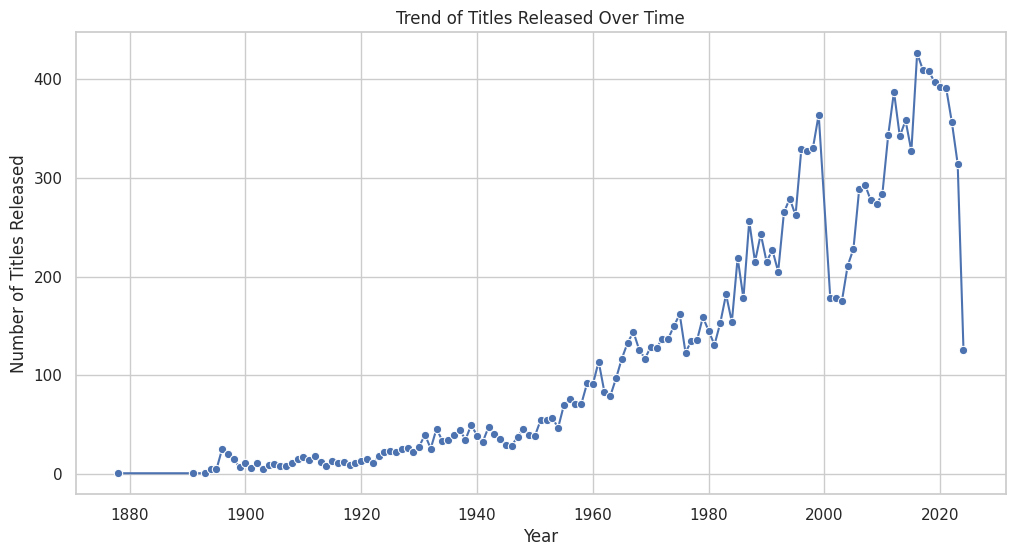

In [ ]:
# Count the number of titles per start year
titles_per_year = train_df['startYear'].dropna().value_counts().sort_index()

# Plot the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x=titles_per_year.index, y=titles_per_year.values, marker='o', color='b')
plt.title('Trend of Titles Released Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Titles Released')

plt.show()

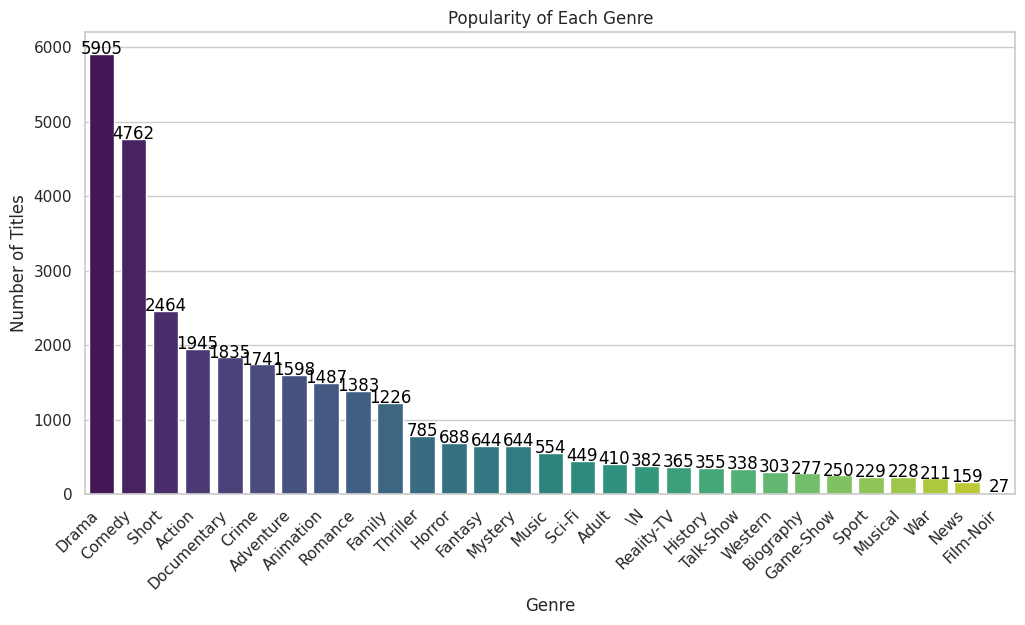

In [ ]:
# Split and count genres
from collections import Counter

# Flatten the genre lists and count each genre
all_genres = train_df['genres'].dropna().str.split(',').sum()
genre_counts = Counter([genre.strip() for genre in all_genres])  # Remove whitespace

# Convert to DataFrame for easy plotting
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Genre', y='Count', data=genre_df, palette="viridis", hue = 'Genre',dodge = False, legend = False)
plt.xticks(rotation=45, ha='right')
plt.title('Popularity of Each Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')

# Display values on top of bars
for index, value in enumerate(genre_df['Count']):
    plt.text(index, value + 0.5, str(value), ha='center', color='black', fontsize=12)

plt.show()

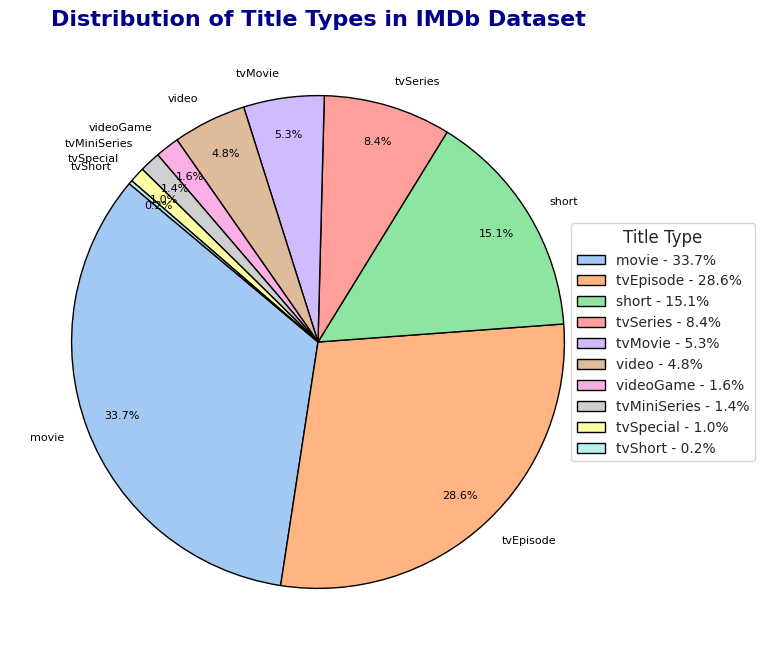

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data for titleType (replace with your actual dataset column)
title_type_counts = train_df['titleType'].value_counts()

# Define colors using a color palette
colors = sns.color_palette("pastel", len(title_type_counts))

# Calculate percentages
percentages = (title_type_counts / title_type_counts.sum()) * 100

# Set figure size
plt.figure(figsize=(10, 8))

# Plot pie chart without labels but add legend instead
wedges, texts, autotexts = plt.pie(
    title_type_counts,
    labels=title_type_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'black'},
    pctdistance=0.85,
    labeldistance =1.1
)

# Set text properties for percentages on the pie chart
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(8)  # Reduced font size for percentage text
    autotext.set_fontweight('normal')

# Set text properties for percentages on the pie chart
for autotext in texts:
    autotext.set_color('black')
    autotext.set_fontsize(8)  # Reduced font size for percentage text
    autotext.set_fontweight('normal')

# Create legend labels with title types and percentages
legend_labels = [f"{label} - {percent:.1f}%" for label, percent in zip(title_type_counts.index, percentages)]

# Add legend with labels, percentages, and smaller font size
plt.legend(
    wedges,
    legend_labels,
    title="Title Type",
    loc="center left",
    bbox_to_anchor=(0.9, 0, 0.5, 1),
    fontsize=10  # Reduced font size for legend labels
)

# Add title
plt.title('Distribution of Title Types in IMDb Dataset', fontsize=16, fontweight='bold', color='darkblue')

# Show plot
plt.show()


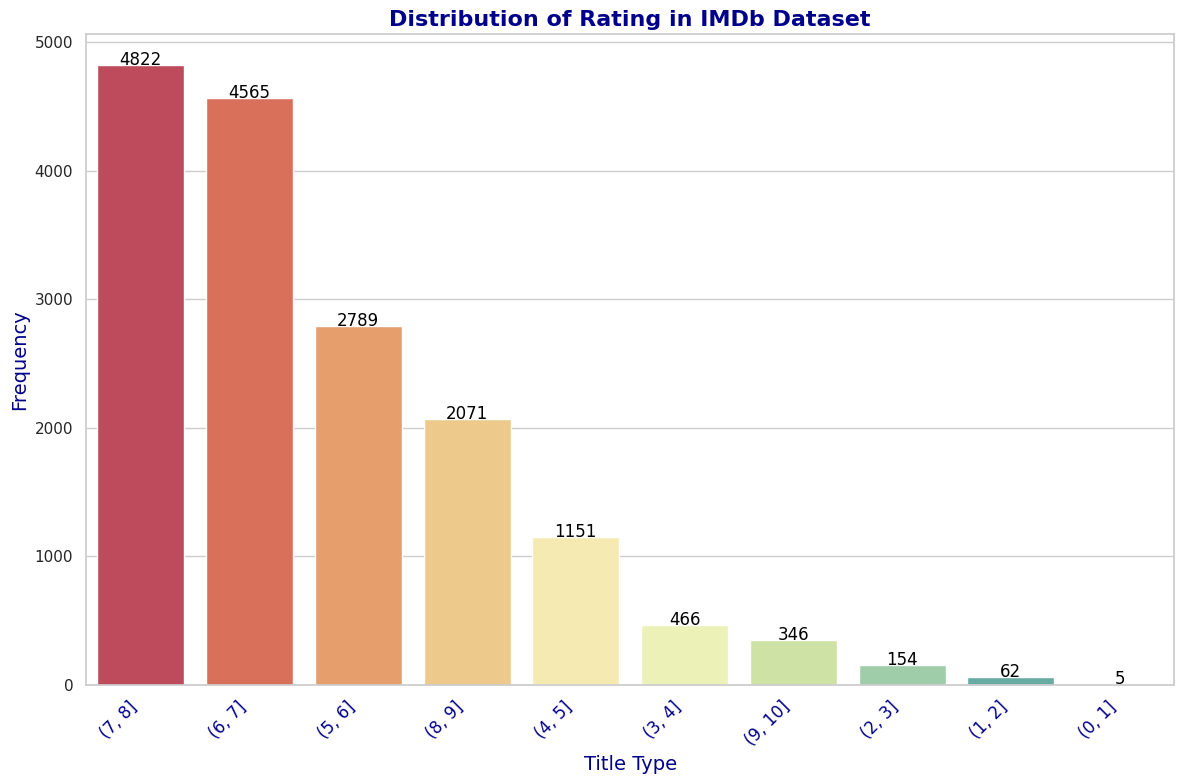

In [ ]:
# Sample data for titleType (replace with your actual dataset column)
title_type_counts = train_df['rating'].value_counts().reset_index()
title_type_counts.columns = ['rating', 'count']

# Set a seaborn theme for styling
sns.set_theme(style="whitegrid")

# Set figure size
plt.figure(figsize=(12, 8))

# Use a color palette
colors = sns.color_palette("Spectral", len(title_type_counts))

# Create bar plot with titleType as hue
sns.barplot(
    data=title_type_counts,
    x='rating',
    y='count',
    hue='rating',  # Assign titleType to hue to avoid warning
    dodge=False,      # Make sure bars don’t stack
    palette=colors,
    legend=False      # Disable legend as it's not needed
)

# Add labels and title
plt.title('Distribution of Rating in IMDb Dataset', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Title Type', fontsize=14, color='darkblue')
plt.ylabel('Frequency', fontsize=14, color='darkblue')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right', fontsize=12, color='darkblue')

# Display values on top of bars
for index, value in enumerate(title_type_counts['count']):
    plt.text(index, value + 0.5, str(value), ha='center', color='black', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
train_df['averageRating']=0
for i in range(len(train_df)):
  train_df['averageRating'][i] = train_df['rating'][i][1]+'.5'
train_df['averageRating'] = pd.to_numeric(train_df['averageRating'])

<ipython-input-72-58aed293b9c8>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  train_df['averageRating'][i] = train_df['rating'][i][1]+'.5'
<ipython-input-72-58aed293b9c8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy o

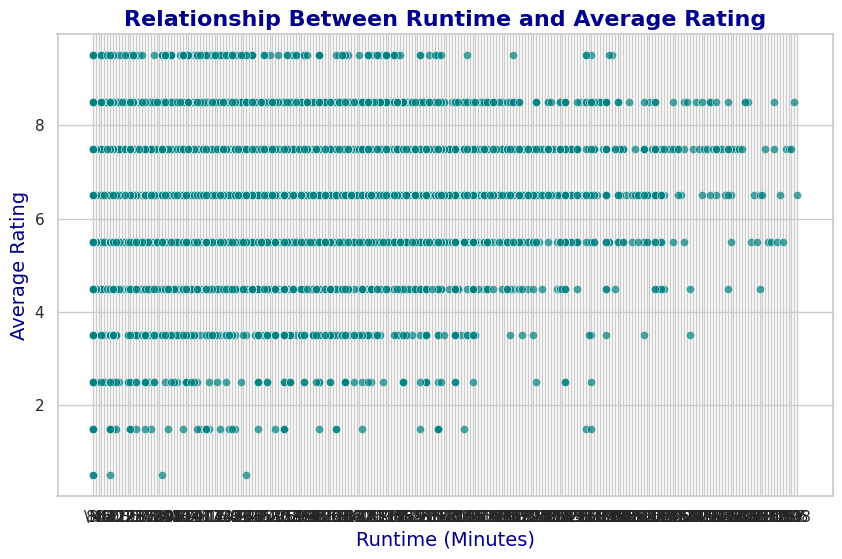

In [ ]:
# 1. Scatter Plot: Relationship between runtimeMinutes and averageRating
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=train_df,
    x='runtimeMinutes',
    y='averageRating',
    alpha=0.7,
    color='teal'
)
plt.title('Relationship Between Runtime and Average Rating', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Runtime (Minutes)', fontsize=14, color='darkblue')
plt.ylabel('Average Rating', fontsize=14, color='darkblue')
plt.show()

<ipython-input-75-08cece9c2d2e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


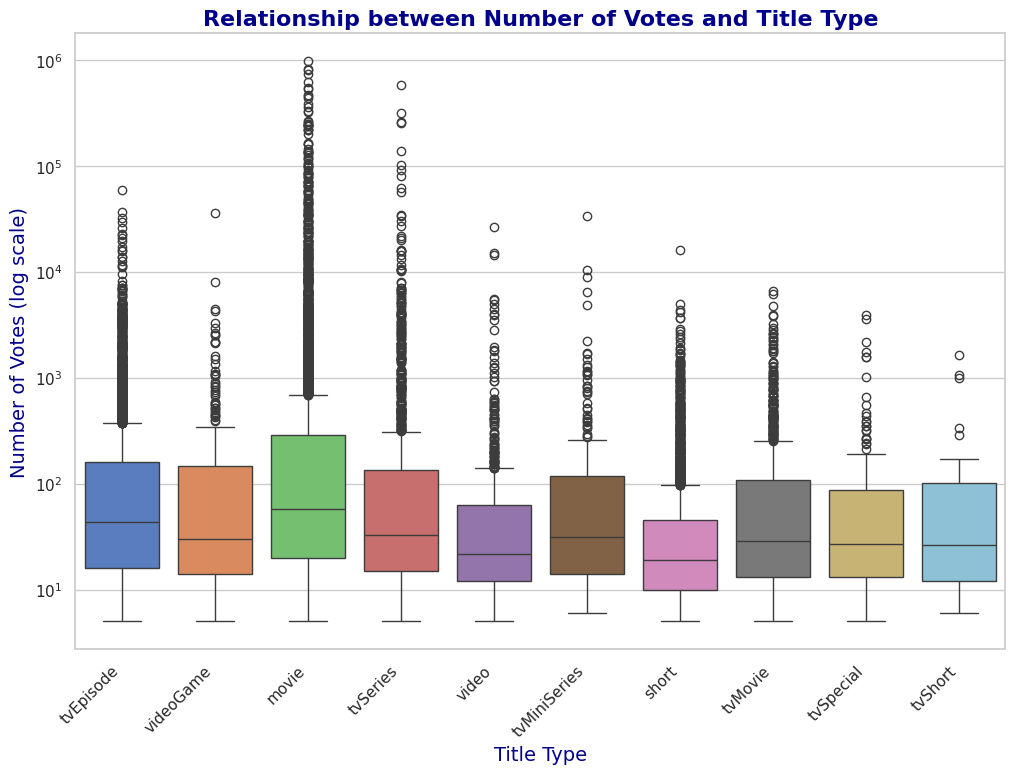

In [ ]:
# Set a seaborn theme for styling
sns.set_theme(style="whitegrid")

# 2. Box Plot: Distribution of numVotes by titleType
plt.figure(figsize=(12, 8))
sns.boxplot(
    data=train_df,
    x='titleType',
    y='numVotes',
    palette='muted'
)
plt.yscale('log')  # Log scale to handle wide range of vote counts
plt.title('Relationship between Number of Votes and Title Type', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Title Type', fontsize=14, color='darkblue')
plt.ylabel('Number of Votes (log scale)', fontsize=14, color='darkblue')
plt.xticks(rotation=45, ha='right')
plt.show()



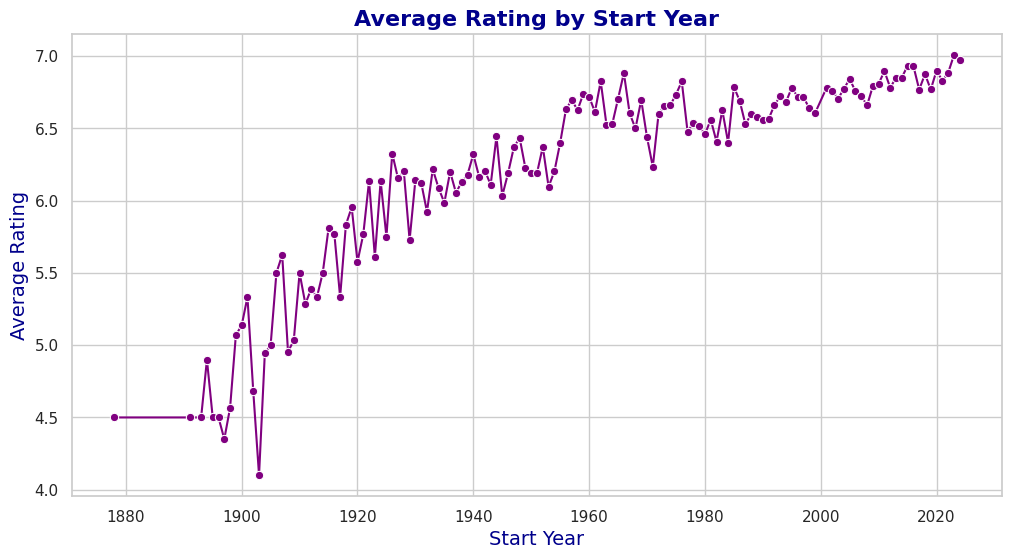

In [ ]:
# 3. Line Plot: Average Rating by Start Year
# Group by startYear and calculate mean averageRating for each year
yearly_ratings = train_df.groupby('startYear')['averageRating'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=yearly_ratings,
    x='startYear',
    y='averageRating',
    color='purple',
    marker='o'
)
plt.title('Average Rating by Start Year', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Start Year', fontsize=14, color='darkblue')
plt.ylabel('Average Rating', fontsize=14, color='darkblue')
plt.show()


In [ ]:
import ast # to convert str to list

country_set = set() #to store the country
for i in range(len(train_df)):
  if train_df['countryOfOrigin'][i]!='\\N': # excluding the undefined value
    country_list = ast.literal_eval(train_df['countryOfOrigin'][i]) #converting the string into list
    for j in country_list:
      country_set.add(j)

print(country_set)

{'HR', 'US', 'EE', 'BH', 'PK', 'LC', 'AT', 'KP', 'AL', 'UA', 'GL', 'SUHH', 'CZ', 'SG', 'VC', 'SI', 'MA', 'CD', 'ID', 'BB', 'RW', 'NL', 'LB', 'PE', 'SM', 'GN', 'GM', 'UY', 'BF', 'SV', 'KH', 'ZW', 'DE', 'NE', 'SE', 'TR', 'UZ', 'MQ', 'SA', 'MO', 'KZ', 'BR', 'GA', 'KG', 'TO', 'AD', 'MT', 'BG', 'AR', 'TN', 'AU', 'KR', 'CA', 'KY', 'LT', 'DDDE', 'ES', 'MK', 'TG', 'AE', 'AF', 'NO', 'HT', 'BA', 'IT', 'LS', 'FI', 'MC', 'LU', 'PR', 'GB', 'CL', 'DZ', 'PT', 'IN', 'GE', 'LV', 'KE', 'GW', 'EC', 'NP', 'LY', 'DO', 'BE', 'TT', 'AZ', 'IQ', 'LI', 'GD', 'HK', 'NA', 'MY', 'MX', 'JP', 'RU', 'XKV', 'HU', 'TH', 'CY', 'XYU', 'CSHH', 'CM', 'CR', 'QA', 'VN', 'YUCS', 'GT', 'BY', 'NG', 'EH', 'CU', 'ET', 'PH', 'CO', 'SK', 'AM', 'EG', 'CSXX', 'KW', 'NZ', 'IR', 'BO', 'SN', 'FR', 'JO', 'GR', 'SY', 'VA', 'PY', 'ZA', 'VE', 'RO', 'PL', 'IE', 'SR', 'ZM', 'RS', 'BD', 'JM', 'GP', 'TW', 'IL', 'CN', 'XWG', 'LK', 'DK', 'MM', 'GY', 'IS', 'AO', 'ML', 'ME', 'CH'}


In [ ]:
import pycountry # library containing the name and code of the country

# Dictionary to store mappings
country_mapping = {}

# Populate the dictionary with country names
for code in country_set:

    # Look up the country using pycountry
    country = pycountry.countries.get(alpha_2=code) or pycountry.countries.get(alpha_3=code)
    # If found, add to the dictionary
    if country:
        country_mapping[code] = country.name
    else:
        print(code)
        country_mapping[code] = "Unknown or historical country"

print(country_mapping)


SUHH
DDDE
XKV
XYU
CSHH
YUCS
CSXX
XWG
{'HR': 'Croatia', 'US': 'United States', 'EE': 'Estonia', 'BH': 'Bahrain', 'PK': 'Pakistan', 'LC': 'Saint Lucia', 'AT': 'Austria', 'KP': "Korea, Democratic People's Republic of", 'AL': 'Albania', 'UA': 'Ukraine', 'GL': 'Greenland', 'SUHH': 'Unknown or historical country', 'CZ': 'Czechia', 'SG': 'Singapore', 'VC': 'Saint Vincent and the Grenadines', 'SI': 'Slovenia', 'MA': 'Morocco', 'CD': 'Congo, The Democratic Republic of the', 'ID': 'Indonesia', 'BB': 'Barbados', 'RW': 'Rwanda', 'NL': 'Netherlands', 'LB': 'Lebanon', 'PE': 'Peru', 'SM': 'San Marino', 'GN': 'Guinea', 'GM': 'Gambia', 'UY': 'Uruguay', 'BF': 'Burkina Faso', 'SV': 'El Salvador', 'KH': 'Cambodia', 'ZW': 'Zimbabwe', 'DE': 'Germany', 'NE': 'Niger', 'SE': 'Sweden', 'TR': 'Türkiye', 'UZ': 'Uzbekistan', 'MQ': 'Martinique', 'SA': 'Saudi Arabia', 'MO': 'Macao', 'KZ': 'Kazakhstan', 'BR': 'Brazil', 'GA': 'Gabon', 'KG': 'Kyrgyzstan', 'TO': 'Tonga', 'AD': 'Andorra', 'MT': 'Malta', 'BG': 'Bulgaria',

In [ ]:
# changing the historical country manually
country_mapping2 = {
    'SUHH': 'Soviet Union',          # SUHH: Soviet Union (historical)
    'DDDE': 'East Germany',           # DDDE: East Germany (historical)
    'XKV': 'Kosovo',                  # XKV: Kosovo (special code used in certain datasets)
    'XYU': 'Yugoslavia',              # XYU: Yugoslavia (historical)
    'CSHH': 'Czechoslovakia',         # CSHH: Czechoslovakia (historical)
    'YUCS': 'Serbia and Montenegro',  # YUCS: Serbia and Montenegro (historical)
    'CSXX': 'Czechoslovakia',         # CSXX: Czechoslovakia (historical alternative code)
    'XWG': 'West Germany'             # XWG: West Germany (historical)
}
country_mapping.update(country_mapping2)
print(country_mapping)


{'HR': 'Croatia', 'US': 'United States', 'EE': 'Estonia', 'BH': 'Bahrain', 'PK': 'Pakistan', 'LC': 'Saint Lucia', 'AT': 'Austria', 'KP': "Korea, Democratic People's Republic of", 'AL': 'Albania', 'UA': 'Ukraine', 'GL': 'Greenland', 'SUHH': 'Soviet Union', 'CZ': 'Czechia', 'SG': 'Singapore', 'VC': 'Saint Vincent and the Grenadines', 'SI': 'Slovenia', 'MA': 'Morocco', 'CD': 'Congo, The Democratic Republic of the', 'ID': 'Indonesia', 'BB': 'Barbados', 'RW': 'Rwanda', 'NL': 'Netherlands', 'LB': 'Lebanon', 'PE': 'Peru', 'SM': 'San Marino', 'GN': 'Guinea', 'GM': 'Gambia', 'UY': 'Uruguay', 'BF': 'Burkina Faso', 'SV': 'El Salvador', 'KH': 'Cambodia', 'ZW': 'Zimbabwe', 'DE': 'Germany', 'NE': 'Niger', 'SE': 'Sweden', 'TR': 'Türkiye', 'UZ': 'Uzbekistan', 'MQ': 'Martinique', 'SA': 'Saudi Arabia', 'MO': 'Macao', 'KZ': 'Kazakhstan', 'BR': 'Brazil', 'GA': 'Gabon', 'KG': 'Kyrgyzstan', 'TO': 'Tonga', 'AD': 'Andorra', 'MT': 'Malta', 'BG': 'Bulgaria', 'AR': 'Argentina', 'TN': 'Tunisia', 'AU': 'Australia'

# Data Preparation

Any missing value? True


<Axes: >

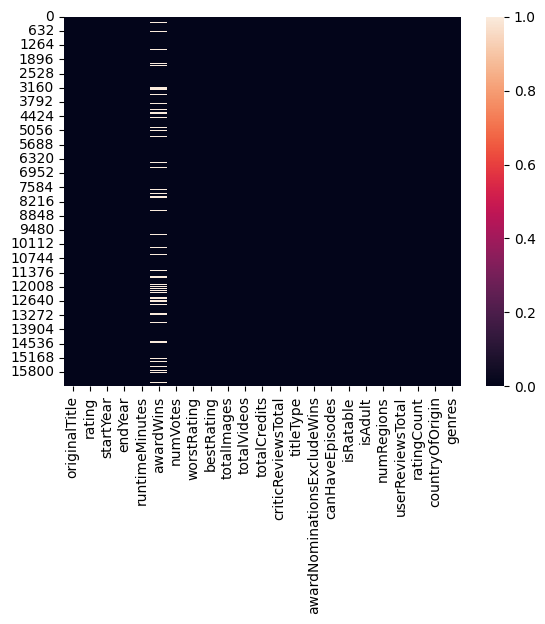

In [ ]:
#Check missing values
print("Any missing value?", train_df.isnull().values.any())

sns.heatmap(train_df.isnull())

In [ ]:
# OMDB API
import requests
import pandas as pd

# Replace with your OMDb API key
api_key = ""

for i in range(len(train_df)):
    if pd.isna(train_df['awardWins'][i]) or train_df['runtimeMinutes'][i]=='\\N' or train_df['genres'][i]=='\\N':
        print(i)
        title = train_df['originalTitle'][i]
        url = f"http://www.omdbapi.com/?t={title}&apikey={api_key}"
        response = requests.get(url)
        data = response.json()
        if response.status_code == 200 and data['Response'] == 'True':
            if pd.isna(train_df['awardWins'][i]):
                train_df.loc[i,'awardWins'] = data.get('Awards')
            if train_df['runtimeMinutes'][i] =='\\N':
                train_df.loc[i,'runtimeMinutes'] = data.get('Runtime').replace(" min", "")  # Remove "min" from runtime
            if train_df['genres'][i] == '\\N':
                train_df.loc[i,'genres'] = data.get('Genre')

In [ ]:
# TMDb API key (replace with your actual API key)
API_KEY = ''

# Function to search for a movie by title and get its ID
def search_movie_id(title):
    url = f"https://api.themoviedb.org/3/search/movie?api_key={API_KEY}&query={title}"
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        #print(data)
        if data['results']:  # If search results are found
            movie_id = data['results'][0]['id']  # Get the ID of the first result
            return movie_id
        else:
            print(f"No results found for {title}")
            return None
    else:
        print(f"Error searching for movie '{title}': {response.status_code}")
        return None

for i in range(len(train_df)):
    if train_df['runtimeMinutes'][i]=='\\N' or train_df['genres'][i]=='\\N':
        print(i)
        title = train_df['originalTitle'][i]
        movie_id = search_movie_id(title)
        if movie_id:
            url = f"https://api.themoviedb.org/3/movie/{movie_id}?api_key={API_KEY}"
            response = requests.get(url)
            if response.status_code == 200:
                data = response.json()
                #print(data)
                train_df.loc[i,'runtimeMinutes'] = data.get('runtime')  # Get the runtime from the response
                genre = data.get('genres')
                s=''
                for j in genre:
                    s= s+j['name']
                train_df.loc[i,'genres'] = s

In [ ]:
# making a copy of train_df to find the mean
train_df2 = train_df[train_df['runtimeMinutes']!='\\N']
train_df2['runtimeMinutes'] = train_df2['runtimeMinutes'].astype(float)

In [ ]:
# getting the unique value of titleType
titleType = list(train_df['titleType'].unique())

# making a new column average rating
train_df['averageRating']=0

tt = {} # storing the mean value in a dictionary
for i in titleType:
    tt[i]=round(train_df2[train_df2['titleType']==i].runtimeMinutes.mean())

# imputing the values
for i in range(len(train_df)):
    if train_df['genres'][i]=='\\N':
        train_df.loc[i,'genres']='Unknown'

    if train_df['runtimeMinutes'][i]=='\\N':
        train_df.loc[i,'runtimeMinutes']=tt[train_df['titleType'][i]]

    if train_df['canHaveEpisodes'][i]==True:
        train_df.loc[i,'canHaveEpisodes'] = 1

    if pd.isna(train_df['awardWins'][i]):
        train_df.loc[i,'awardWins']=0

    train_df.loc[i,'averageRating'] = train_df['rating'][i][1]+'.5'

In [ ]:
# changing the data type to numeric values
train_df['averageRating'] = pd.to_numeric(train_df['averageRating'])
train_df['runtimeMinutes'] = pd.to_numeric(train_df['runtimeMinutes'])
train_df['canHaveEpisodes'] = pd.to_numeric(train_df['canHaveEpisodes'])

In [ ]:
# Drop columns
train_df = train_df.drop(['rating', 'endYear', 'worstRating', 'bestRating','isRatable'], axis=1)

# Data Transformation

In [ ]:
import numpy as np
from scipy.spatial.distance import mahalanobis

# All the numeric column name
cols_to_check = ['startYear', 'runtimeMinutes', 'awardWins', 'numVotes', 'totalImages',
       'totalVideos', 'totalCredits', 'criticReviewsTotal',
       'awardNominationsExcludeWins', 'canHaveEpisodes', 'isAdult',
       'numRegions', 'userReviewsTotal', 'ratingCount', 'averageRating']
data = train_df[cols_to_check]

# Compute covariance matrix and its inverse
cov_matrix = np.cov(data.values.T)
inv_cov_matrix = np.linalg.inv(cov_matrix)
mean_values = np.mean(data, axis=0)

# Calculate Mahalanobis distance for each row
distances = data.apply(lambda x: mahalanobis(x, mean_values, inv_cov_matrix), axis=1)

# Define an outlier threshold
threshold = np.percentile(distances, 97)  # Top 3% as outliers
train_df = train_df[distances <= threshold]

In [ ]:
#resetting the index
train_df.reset_index(drop = True, inplace = True)

#making a dictionary to store frequencies
type_dict = train_df['titleType'].value_counts().to_dict()

#making a new column
train_df['titleTypeEncoded'] = 0

for i in range(len(train_df)):
    train_df.loc[i,'titleTypeEncoded'] = type_dict[train_df['titleType'][i]]

In [ ]:
# Split and count genres
from collections import Counter

# Flatten the genre lists and count each genre
all_genres = train_df['genres'].str.split(',').sum()
genre_counts = Counter([genre.strip() for genre in all_genres])  # Remove whitespace

# making a new column
train_df['genresEncoded'] = 0

for i in range(len(train_df)):
    s = 0
    for j in train_df['genres'][i].split(','):
        s = s + genre_counts[j.strip()]
    train_df.loc[i,'genresEncoded'] = s

['endYear', 'runtimeMinutes', 'genres']

In [ ]:
#converting into the desired string format
for i in range(len(train_df)):
    train_df.loc[i,'countryOfOrigin'] = train_df['countryOfOrigin'][i].replace("'","").replace('[','').replace(']','')

# Flatten the genre lists and count each genre
all_country = train_df['countryOfOrigin'].str.split(',').sum()
country_counts = Counter([country.strip() for country in all_country])  # Remove whitespace

# making a new column
train_df['countryEncoded'] = 0

for i in range(len(train_df)):
    s = 0
    for j in train_df['countryOfOrigin'][i].split(','):
        s = s + country_counts[j.strip()]
    train_df.loc[i,'countryEncoded'] = s


In [ ]:
train_df.drop(['titleType','countryOfOrigin','genres'],axis = 1, inplace = True)
train_df.drop_duplicates(inplace = True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns for transformation
numerical_columns = train_df.select_dtypes('number').columns  # Replace with relevant column names

# Step 1: Log Transformation
# Apply log transformation to reduce skewness
df_log_transformed = train_df[numerical_columns].apply(lambda x: np.log1p(x))

# Step 2: Normalization
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply normalization
df_normalized = pd.DataFrame(
    scaler.fit_transform(df_log_transformed),
    columns=numerical_columns,
    index=train_df.index
)

# Replace original columns with normalized ones in the dataset
train_df[numerical_columns] = df_normalized

In [ ]:
# Select only numerical columns for correlation
numerical_columns = train_df.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix
correlation_matrix = train_df[numerical_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,  # Display correlation coefficients
    fmt=".2f",   # Format the numbers to 2 decimal places
    cmap="coolwarm",  # Color map
    cbar=True,    # Show the color bar
    square=True   # Make the cells square
)

plt.title("Pairwise Correlation Heatmap")
plt.show()

# Clustering

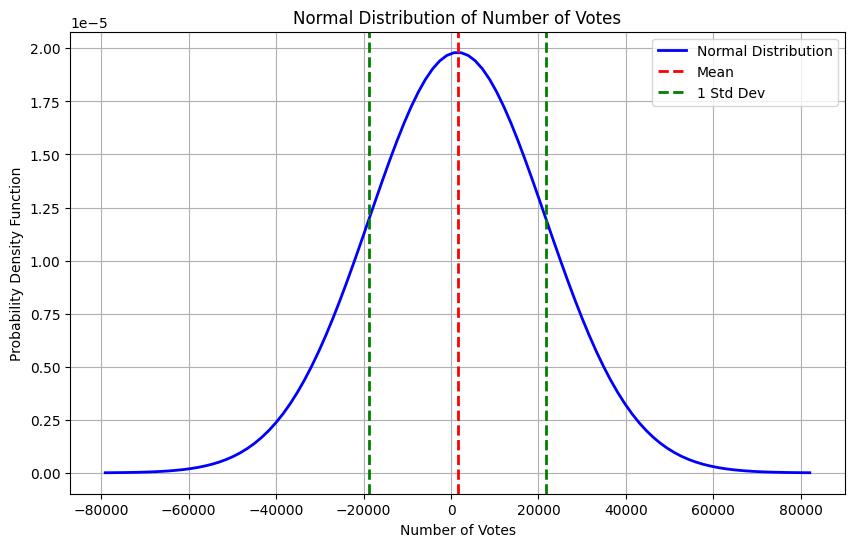

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import norm

# Calculate mean and standard deviation
mean = train_df['numVotes'].mean()
std_dev = train_df['numVotes'].std()

# Create a range of values for x-axis
x = np.linspace(mean - 4 * std_dev, mean + 4 * std_dev, 100)

# Calculate the normal distribution (PDF)
pdf = norm.pdf(x, mean, std_dev)

# Plotting the normal distribution
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, color='blue', label='Normal Distribution', linewidth=2)
plt.title('Normal Distribution of Number of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Probability Density Function')
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(mean + std_dev, color='green', linestyle='dashed', linewidth=2, label='1 Std Dev')
plt.axvline(mean - std_dev, color='green', linestyle='dashed', linewidth=2)
plt.legend()
plt.grid()
plt.show()


Skewness: 0.02508812216419003


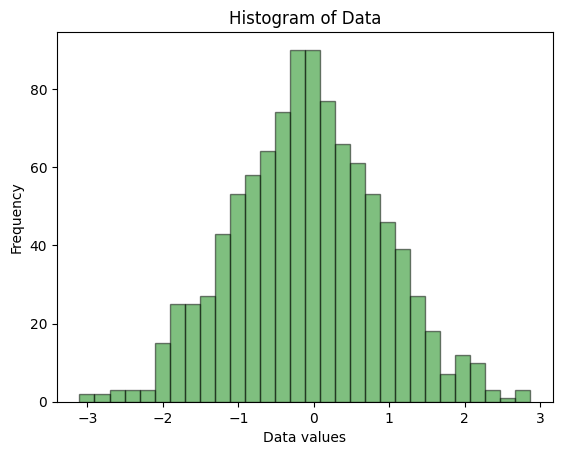

<ipython-input-53-8095aec1c755>:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, shade=True)


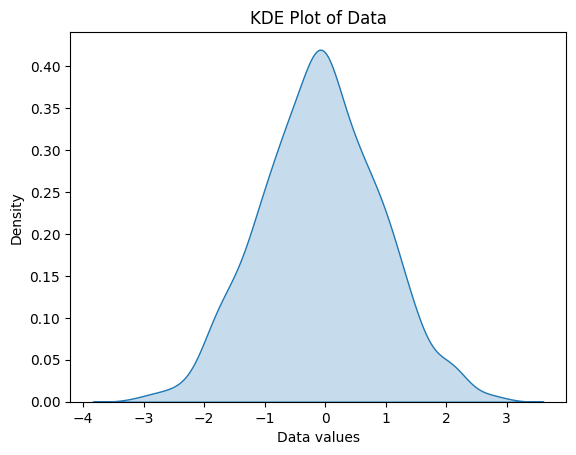

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Example: Generating random data
data = np.random.normal(0, 1, 1000)

skewness_value = skew(data)
print(f'Skewness: {skewness_value}')

# Plotting the histogram
plt.hist(data, bins=30, alpha=0.5, color='g', edgecolor='black')
plt.title('Histogram of Data')
plt.xlabel('Data values')
plt.ylabel('Frequency')
plt.show()

# Plotting the KDE (Kernel Density Estimate) for better visualization
sns.kdeplot(data, shade=True)
plt.title('KDE Plot of Data')
plt.xlabel('Data values')
plt.ylabel('Density')
plt.show()


Skewness: 28.51875826085117


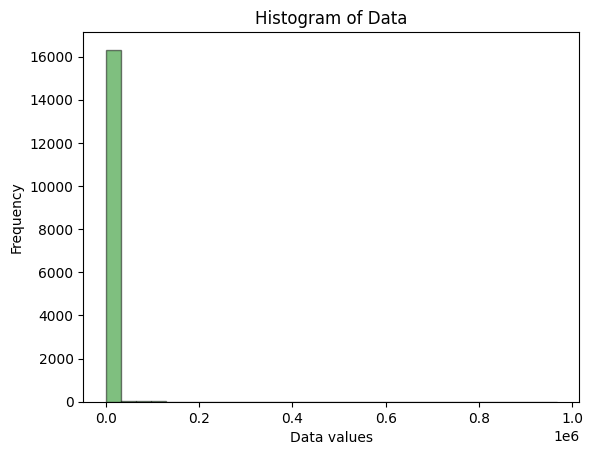

<ipython-input-54-0c24b225d24e>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_df['numVotes'], shade=True)


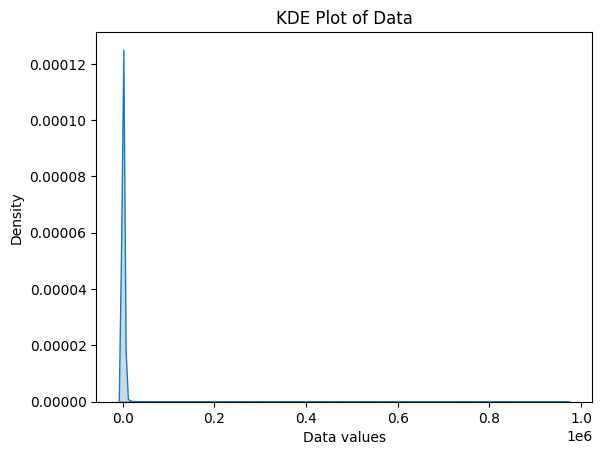

In [ ]:
skewness_value = skew(train_df['numVotes'])
print(f'Skewness: {skewness_value}')

# Plotting the histogram
plt.hist(train_df['numVotes'], bins=30, alpha=0.5, color='g', edgecolor='black')
plt.title('Histogram of Data')
plt.xlabel('Data values')
plt.ylabel('Frequency')
plt.show()

# Plotting the KDE (Kernel Density Estimate) for better visualization
sns.kdeplot(train_df['numVotes'], shade=True)
plt.title('KDE Plot of Data')
plt.xlabel('Data values')
plt.ylabel('Density')
plt.show()

In [ ]:
On 30 meeting we have to choose the classification task
choose the clustering task

**Things to Do**

1.   Since 'awardWins' has null values try to check some of the title manually whether that film has got any awards or not and if not we can replace the null values with 0
2.  Replace '\N' with 0




**Analysis to be done**

1.   We can see how many films and how many series
2.   With run time we can see which genre has average duration
3.  

